# Prezentacja - Moduł Praktyczny

## Instalacja i przygotowanie środowiska
<div class="alert alert-block alert-info">
<b>Wskazówka</b> Najlepiej wszystkie komendy i proces instalacji zrobić w Anaconda Prompt. W notatnikach Jupyter nie widać postępów i dłużące się czekanie może być uciążliwe.
</div>

Aby stworzyć wirtualne środowisko dla swojego projektu a następnie dodać je do notatnika jupyter wykonaj poniższe polecenia w konsoli:
```
conda create --name timeSeries
conda activate timeSeries
conda install -c anaconda ipykernel
python -m ipykernel install --user --name=timeSeries
```

##  Import bibliotek

In [1]:
from prophet import Prophet
import warnings
warnings.simplefilter('ignore')
import pandas as pd

Importing plotly failed. Interactive plots will not work.


<div class="alert alert-block alert-success">
    <b>Biblioteka Prophet</b> <a>https://facebook.github.io/prophet/docs/quick_start.html#python-api</a>
</div>

## Praca z danymi
Prezentacjebiblioteki Prophet chciałbym dokonać na tym zbiorze danych zaczerpniętym ze strony Kaggle: https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet/data
W danych mamy dwie kolumny. Dany wiersz opisuje ilu pasażerów podróżowało danego miesiąca. Korzystając z tych danych spróbujemy przewidzieć trend podróży w przyszłości...

In [2]:
df = pd.read_csv('./data/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.rename({'Month':'ds', '#Passengers':'y'}, axis=1, inplace=True)

In [4]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=365)

In [7]:
future.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [8]:
future.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
504,1961-11-27,499.560922,472.275036,526.689396
505,1961-11-28,497.972345,469.691895,526.676926
506,1961-11-29,495.676581,468.475496,524.019519
507,1961-11-30,492.715568,465.712983,521.093611
508,1961-12-01,489.148570,461.127255,520.220654


## Wykresy
- Niebieska linia ciągła oznacza predykcje
- Jasno niebieskie pole oznacza margines błędu (wyznaczony przez y_hat_upper oraz y_hat_lower)
- Czarne punkty oznaczają faktycznie istniejące wartości

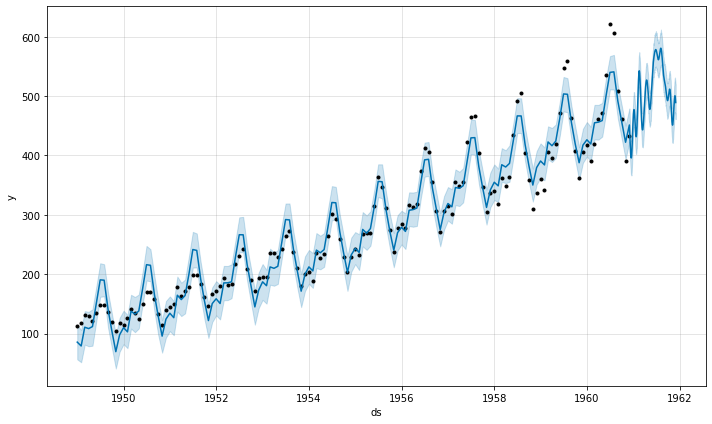

In [10]:
fig = m.plot(forecast)

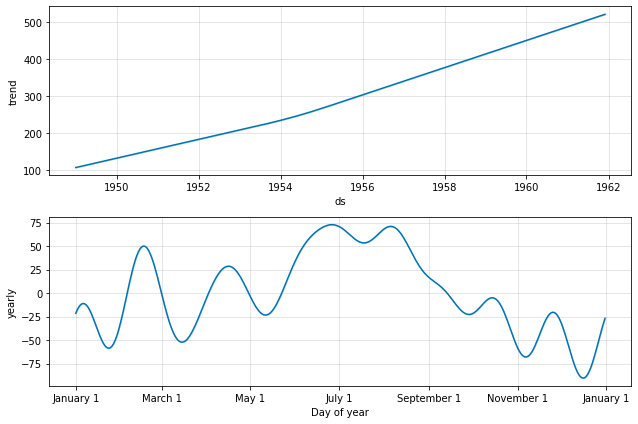

In [11]:
fig = m.plot_components(forecast)

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(m, forecast)
# plot_components_plotly(m, forecast)